## TAXIS

In [ ]:
#Importing the Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [19]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
# Loading the Taxis Dataset

In [18]:
df = sns.load_dataset('taxis')
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [21]:
#Understanding the number of row and columns of the dataset
df.shape

(6433, 14)

In [22]:
#Check for Null values
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [29]:
# Dropping the null values since we can't treate them
df = df.dropna(subset=['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'])
df = df.reset_index(drop=True)

In [30]:
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [49]:
# Distribution of payment methods
df["payment"].value_counts(normalize=True) * 100

payment
credit card    71.692162
cash           28.307838
Name: proportion, dtype: float64

In [44]:
# Most common pickup zones
df["pickup_zone"].value_counts().head(10)

pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Clinton East                    208
Upper East Side South           208
Midtown East                    196
Upper East Side North           185
Times Sq/Theatre District       182
Union Sq                        180
Lincoln Square East             176
Murray Hill                     159
Name: count, dtype: int64

In [43]:
# Average fare per passenger count
df.groupby("passengers")["total"].mean().reset_index()

,passengers,total
0,0,19.063889
1,1,18.201552
2,2,18.545780
3,3,18.749958
4,4,19.145229
5,5,18.140975
6,6,18.834934


In [47]:
# Average tip % of total fare
df["tip_percent"] = (df["tip"] / df["total"]) * 100
df["tip_percent"].mean()

np.float64(10.111888652260548)

In [45]:
# Most expensive pickup–dropoff route
df.groupby(["pickup_zone", "dropoff_zone"])["total"].mean().sort_values(ascending=False).head(10)

pickup_zone                        dropoff_zone                 
Sunset Park West                   Saint Albans                     94.800
Coney Island                       Upper East Side North            92.400
University Heights/Morris Heights  Yorkville East                   82.360
TriBeCa/Civic Center               West Brighton                    81.350
JFK Airport                        Cobble Hill                      79.145
                                   Meatpacking/West Village West    78.670
South Jamaica                      Flushing Meadows-Corona Park     78.670
Clinton West                       JFK Airport                      78.660
JFK Airport                        Lenox Hill West                  78.660
Cambria Heights                    Morningside Heights              77.610
Name: total, dtype: float64

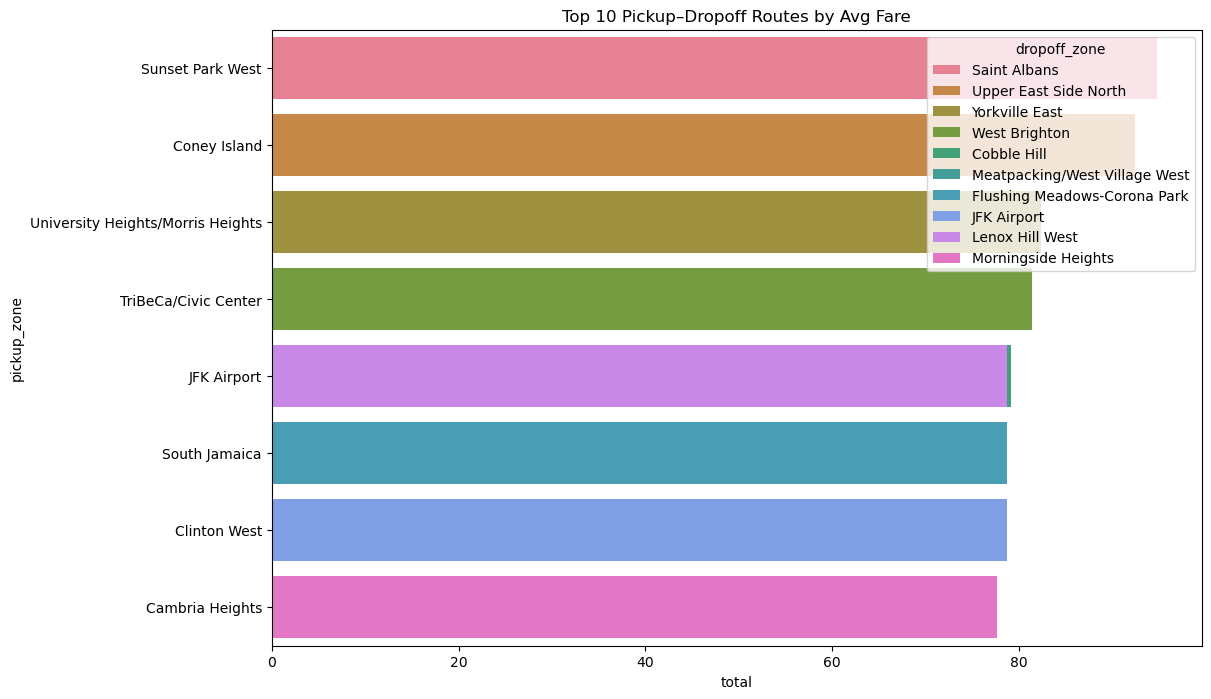

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=zone_total.sort_values("total", ascending=False).head(10),
    x="total", y="pickup_zone", hue="dropoff_zone", dodge=False, palette="husl"
)
plt.title("Top 10 Pickup–Dropoff Routes by Avg Fare")
plt.show()

In [48]:
# Which boroughs have the highest fares?
df.groupby("pickup_borough")["total"].mean().reset_index().sort_values(by="total", ascending=False)

,pickup_borough,total
3,Queens,30.944655
0,Bronx,22.765253
1,Brooklyn,19.192011
2,Manhattan,16.619661


In [50]:
# Longest trips by distance
df.nlargest(10, "distance")[["pickup_zone", "dropoff_zone", "distance", "total"]]

,pickup_zone,dropoff_zone,distance,total
5286,JFK Airport,JFK Airport,36.70,174.82
2361,JFK Airport,Meatpacking/West Village West,30.23,78.67
1514,World Trade Center,JFK Airport,28.30,63.06
3824,Financial District North,JFK Airport,28.15,74.76
4162,JFK Airport,Cobble Hill,26.92,100.49
5488,Sunset Park West,Saint Albans,25.51,94.80
3013,East Harlem North,Brooklyn Heights,25.28,70.80
5380,Starrett City,Washington Heights North,24.48,69.79
1363,JFK Airport,Riverdale/North Riverdale/Fieldston,24.20,76.70
6092,Kingsbridge Heights,Kingsbridge Heights,23.61,65.25


In [51]:
# Correlation between fare, distance, and tips
df[["distance", "fare", "tip", "total"]].corr()

,distance,fare,tip,total
distance,1.000000,0.947958,0.476980,0.929224
fare,0.947958,1.000000,0.487101,0.972311
tip,0.476980,0.487101,1.000000,0.650677
total,0.929224,0.972311,0.650677,1.000000


In [52]:
# Average fare per color of taxi 
df.groupby("color")["total"].mean().reset_index()

,color,total
0,green,16.421291
1,yellow,18.650581


In [53]:
# Peak zones with high passenger count
df.groupby("pickup_zone")["passengers"].sum().sort_values(ascending=False).head(10)

pickup_zone
Midtown Center                  360
Clinton East                    330
Upper East Side South           325
Penn Station/Madison Sq West    324
Midtown East                    324
Times Sq/Theatre District       315
Upper East Side North           281
Union Sq                        280
East Village                    267
Lincoln Square East             239
Name: passengers, dtype: int64

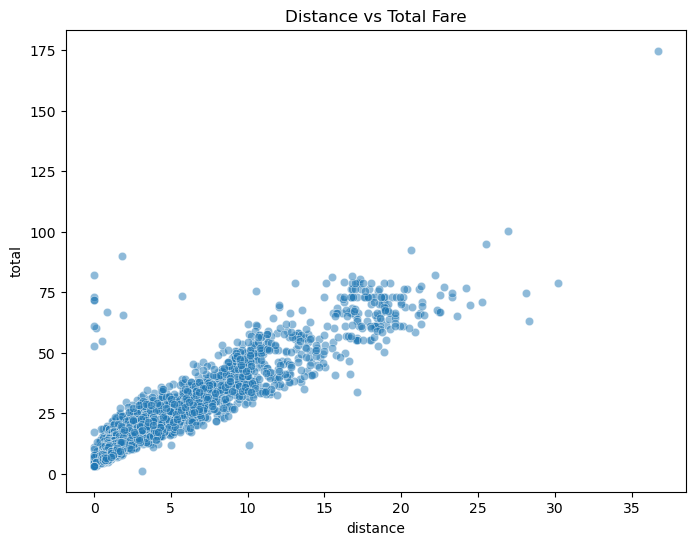

In [34]:
# How the total fare changes based on the distance of the ride?
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="distance", y="total", alpha=0.5)
plt.title("Distance vs Total Fare")
plt.show()

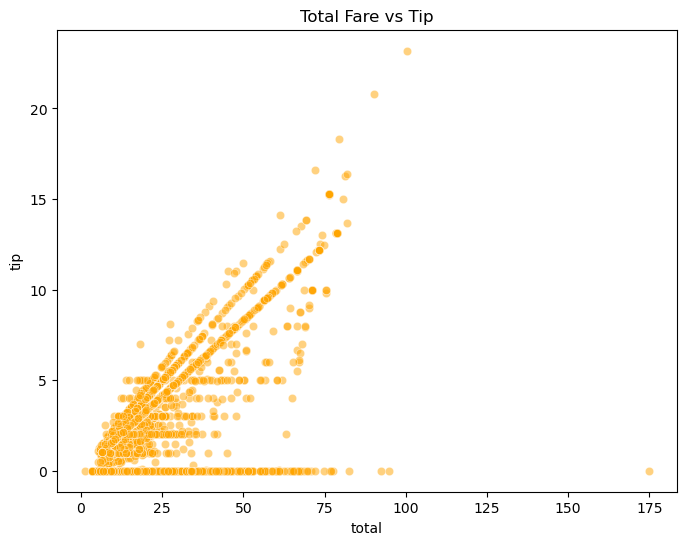

In [35]:
# Comparing the total fare and the tip given based on the fare.
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total", y="tip", alpha=0.5, color="orange")
plt.title("Total Fare vs Tip")
plt.show()